# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('vehiclesFinal.csv')
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012.0,jeep,patriot,like new,4 cylinders,gas,247071.0,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014.0,bmw,328i m-sport,good,5 cylinders,gas,76237.0,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005.0,ford,mustang convertible,excellent,6 cylinders,gas,62800.0,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


# Basic Information about Dataset

#### Statistics About Numerical Columns

In [3]:
df.describe()

,id,year,odometer,lat,long,price
count,3.742220e+05,374222.000000,374222.000000,374222.000000,374222.000000,374222.000000
mean,7.115975e+09,2011.170933,99082.730455,38.467335,-94.839612,14251.653588
std,4.583794e+06,5.264778,56671.829463,6.089110,17.994045,11137.719627
min,7.104271e+09,1995.000000,0.000000,-83.197100,-177.012000,699.000000
25%,7.112466e+09,2008.000000,53503.250000,34.245500,-110.979000,6000.000000
50%,7.117111e+09,2012.000000,97235.000000,39.049600,-89.438545,11500.000000
75%,7.120107e+09,2015.000000,138134.000000,42.510000,-81.431300,18995.000000
max,7.121608e+09,2021.000000,268564.000000,79.601900,139.388000,126000.000000


#### Overview of Categorical Columns

In [4]:
df.describe(exclude='number')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color
count,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222,374222
unique,402,41,27908,6,8,5,6,3,3,4,13,12
top,springfield,ford,f-150,fair,5 cylinders,gas,clean,automatic,4wd,full-size,offroad,grey
freq,3053,66329,7009,158429,141407,325266,354719,338265,226906,318879,96965,138308


#### Datatypes of Columns

In [5]:
df.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

#### Dimensions of Dataset

In [6]:
df.shape

(374222, 18)

#### All Columns in Dataset

In [7]:
df.columns

Index(['id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long', 'price'],
      dtype='object')

In [8]:
# df = df.drop(['id', 'manufacturer', 'model', 'region', 'lat', 'long', 'paint_color'], axis=1)

# Data Preprocessing

In [9]:
df.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

## Handling Missing Values

In [10]:
# Removing 'cylinders' from cylinders column

df['cylinders'] = df['cylinders'].str.extract('(\d+)')

In [11]:
df['cylinders'].fillna(method='bfill', inplace=True)
# df['cylinders'].ffill()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14568\1042531318.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(method='bfill', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14568\1042531318.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['cylinders'].fillna(method='bfill', inplace=True)


In [12]:
df.isna().sum()

id              0
region          0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
lat             0
long            0
price           0
dtype: int64

In [13]:
df['cylinders'].unique()

array(['4', '5', '6', '8', '10', '12', '3'], dtype=object)

In [14]:
df['cylinders'] = df['cylinders'].astype(int)

In [15]:
df['year'] = df['year'].astype(int)

In [16]:
df['year'].nunique()

27

In [17]:
# Converting dtype of 'odometer' to int
df['odometer'] = df['odometer'].astype(int)

In [18]:
df.dtypes

id                int64
region           object
year              int64
manufacturer     object
model            object
condition        object
cylinders         int64
fuel             object
odometer          int64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
lat             float64
long            float64
price             int64
dtype: object

In [19]:
df.head(3)

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300


In [20]:
df['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [21]:
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004,chevrolet,colorado ls,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005,ford,mustang convertible,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


# Extracting Numerical and Categorical Features

In [22]:
# Extracting Numerical Columns
num_features = df.select_dtypes('number').columns
num_features

Index(['id', 'year', 'cylinders', 'odometer', 'lat', 'long', 'price'], dtype='object')

In [23]:
# Extracting Categorical Columns
cat_features = df.select_dtypes(exclude='number').columns
cat_features

Index(['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color'],
      dtype='object')

# Heatmaps

Text(0.5, 1.0, 'Correlation Heatmap')

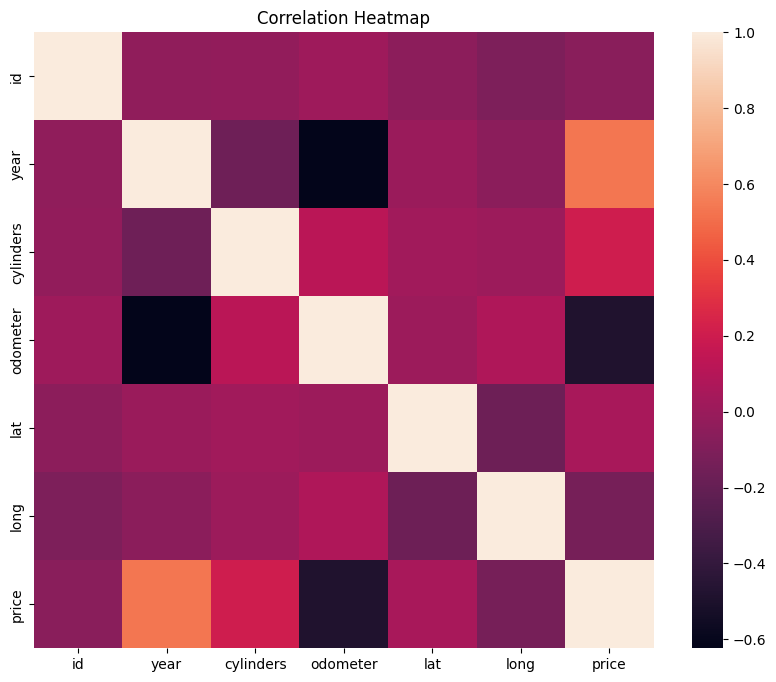

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_features].corr())
plt.title('Correlation Heatmap')

<Axes: >

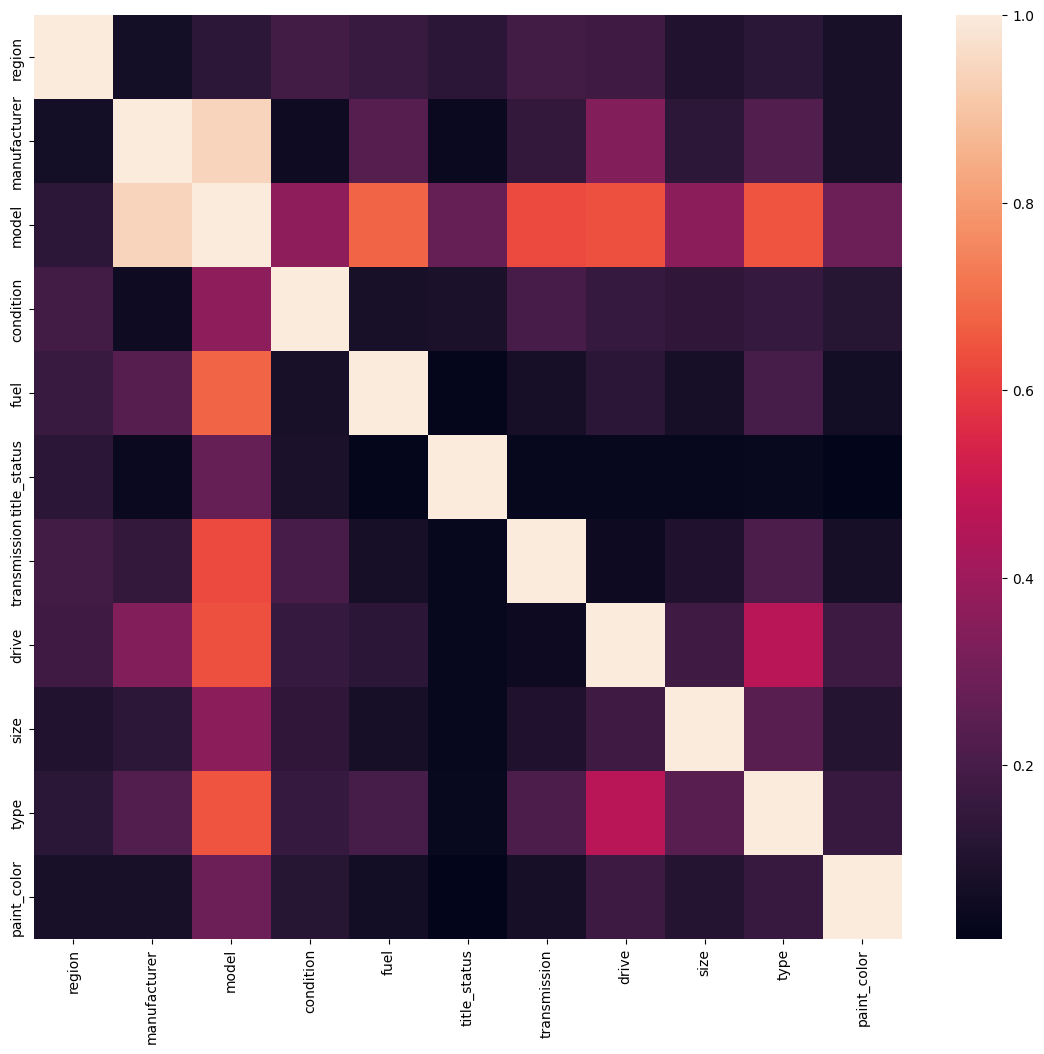

In [25]:
from dython.nominal import associations

assoc = associations(df[cat_features], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

## Handling Duplicates

In [26]:
# Boolean Duplicates
df_duplicates = df.duplicated()

In [27]:
# Identifying Duplicates Rows
duplicate_rows = df[df.duplicated()]

In [28]:
# Controlling Duplicates Detection with 'Keep'

all_duplicates = df[df.duplicated(keep=False)]

In [29]:
# Removing duplicate rows
df_no_duplicates = df.drop_duplicates()

In [30]:
df.shape

(374222, 18)

### Handling Outliers

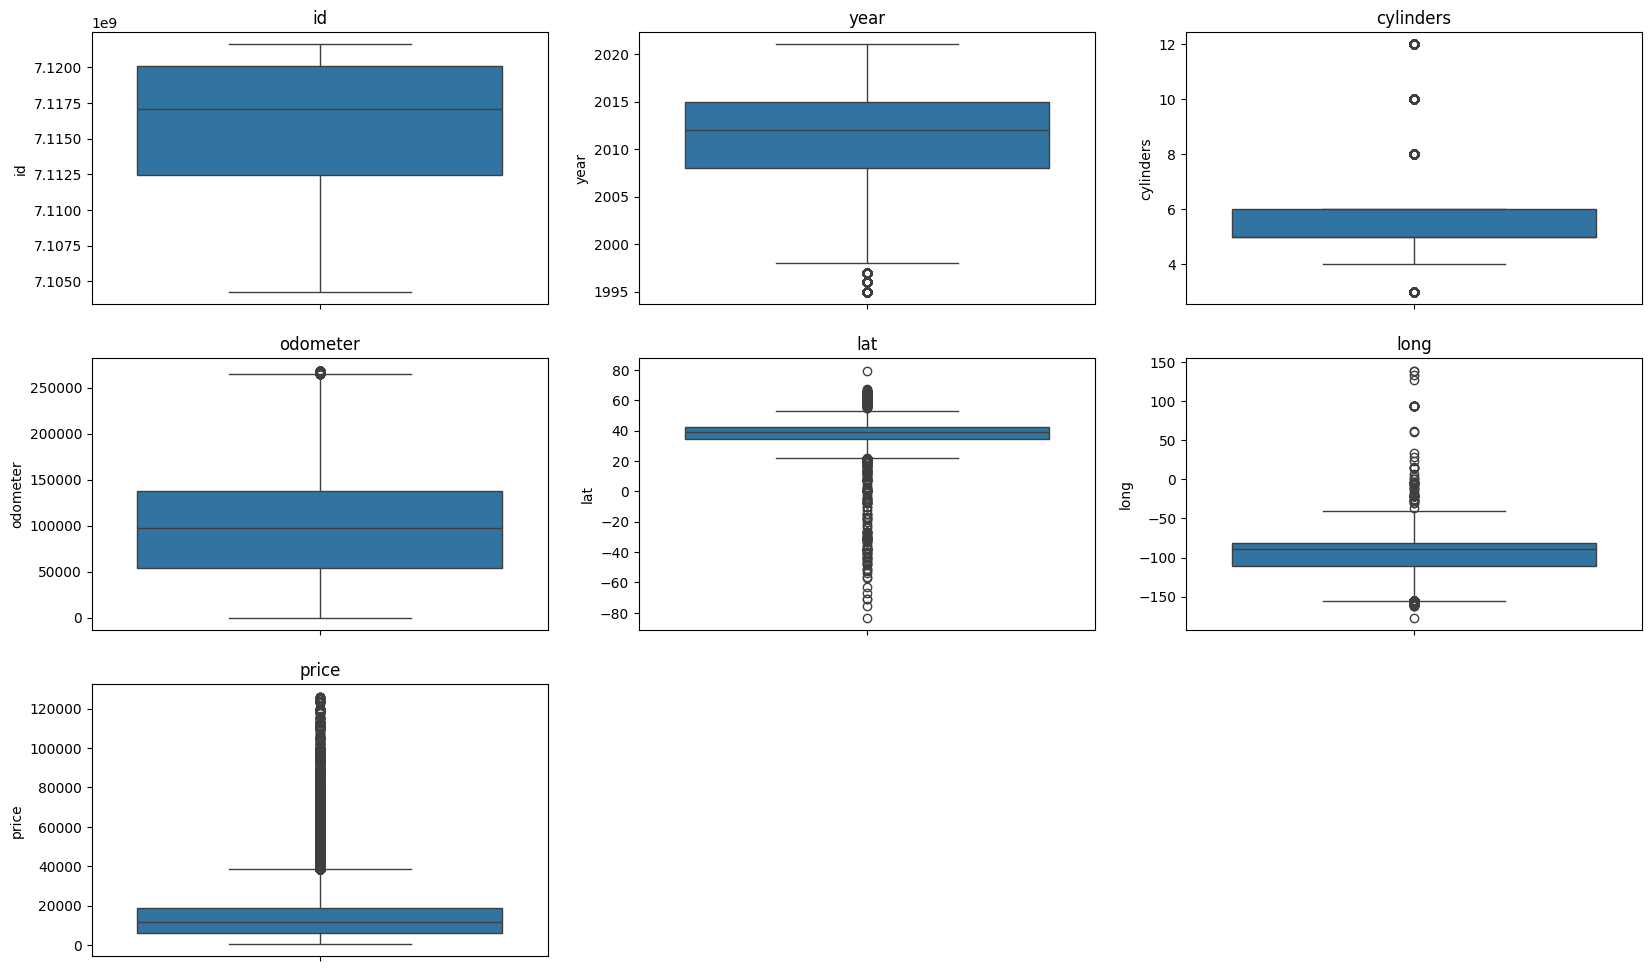

In [31]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

In [32]:
for col in num_features:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    threshold = 3
    df = df[z_scores < threshold]

In [33]:
df.shape

(359422, 18)

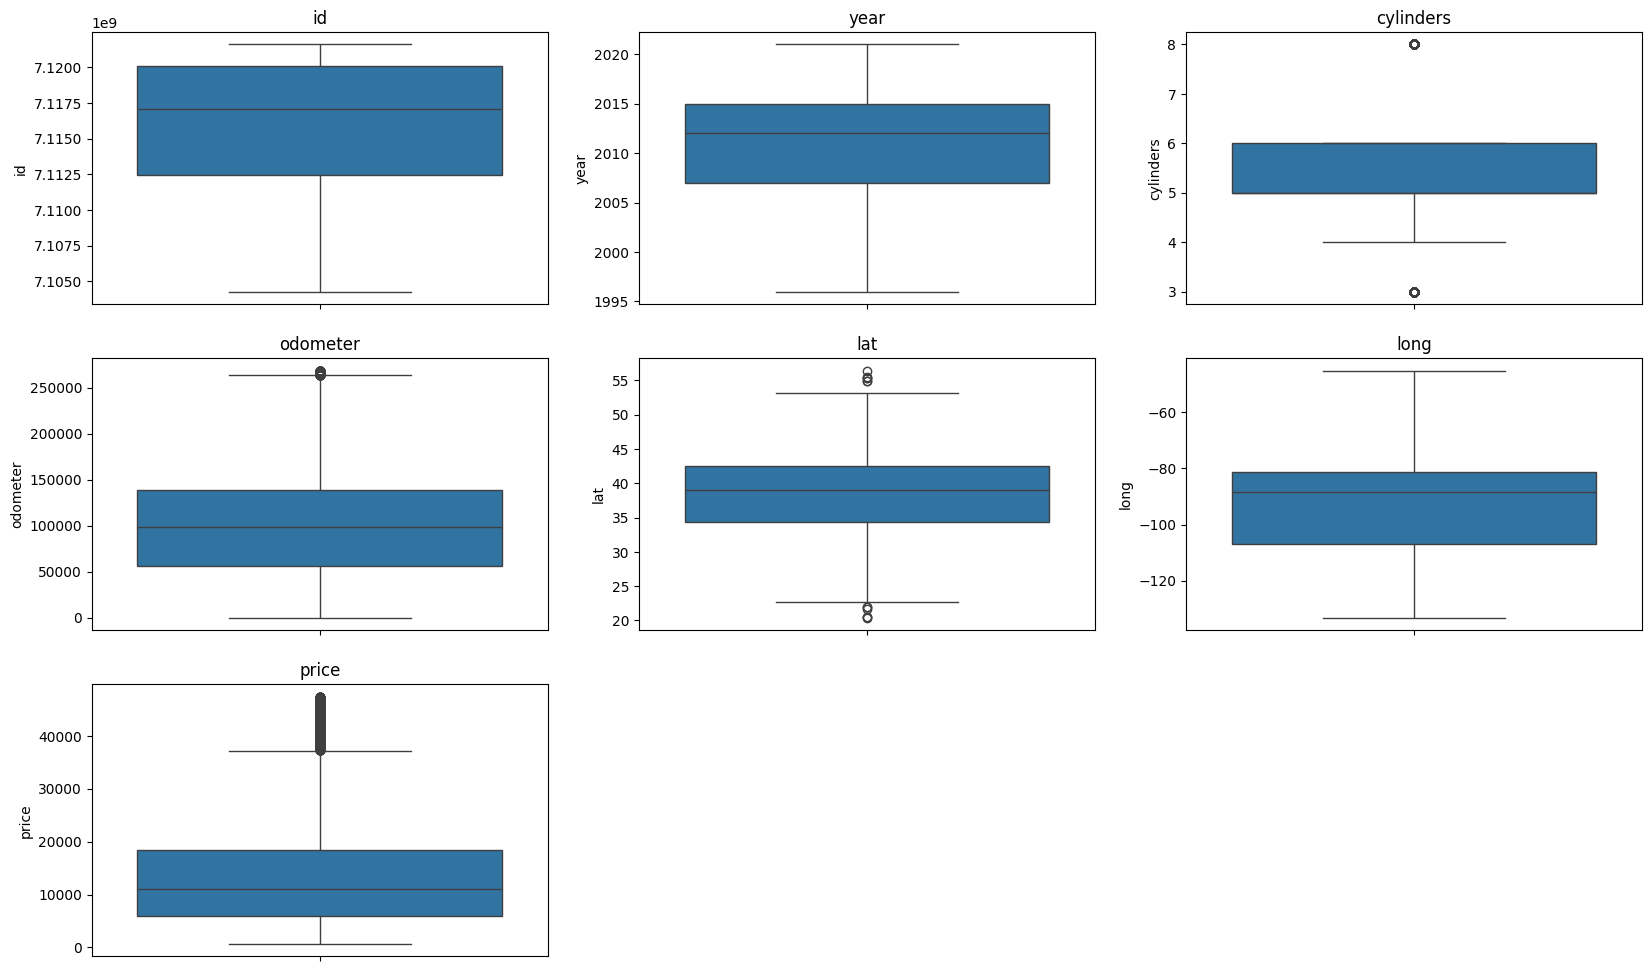

In [34]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

# Data Visualization

#### Year vs Count of Cars

In [35]:
car_count_by_year = df.groupby('year').size()
print(len(car_count_by_year))

26


In [36]:
car_counts = df['year'].value_counts().sort_index()

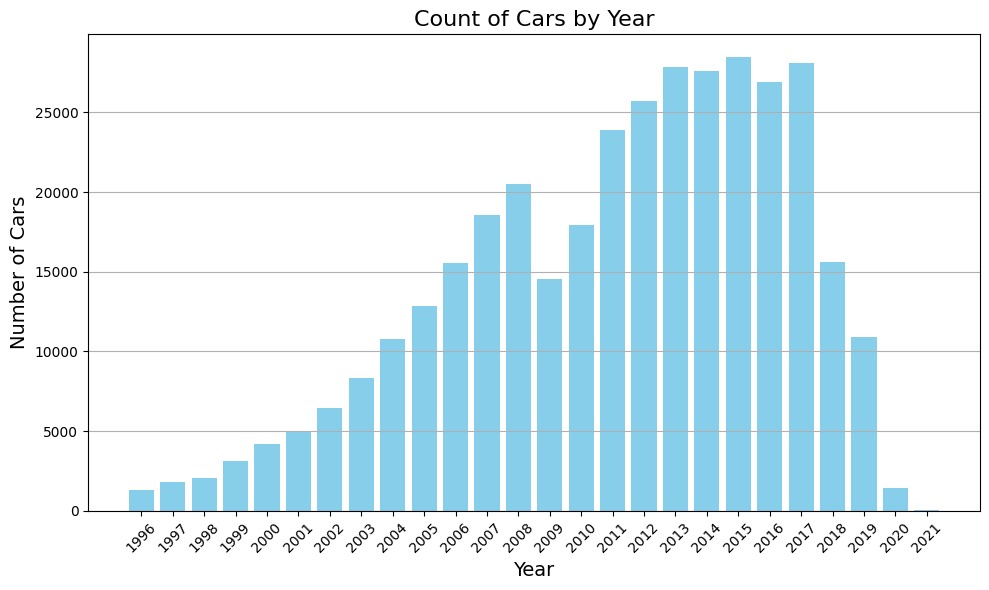

In [37]:
plt.figure(figsize=(10, 6))
plt.bar(car_counts.index.astype(str), car_counts.values, color='skyblue')
plt.title('Count of Cars by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Condition vs Count of Cars

In [38]:
condition_counts = df['condition'].value_counts().sort_index()

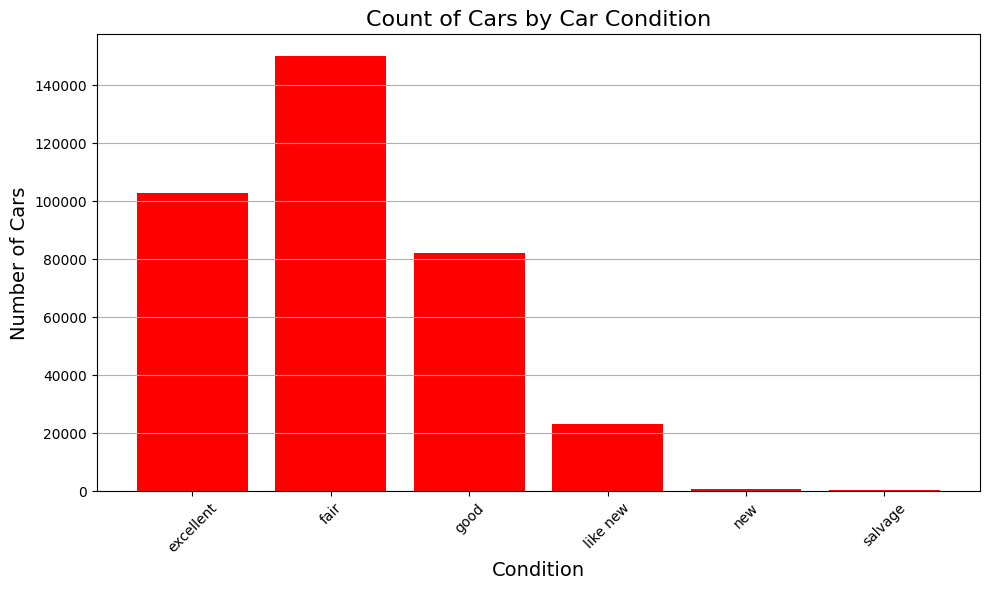

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index.astype(str), condition_counts.values, color='red')
plt.title('Count of Cars by Car Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Cylinders vs Count of Cars

In [40]:
cylinders_counts = df['cylinders'].value_counts().sort_index()

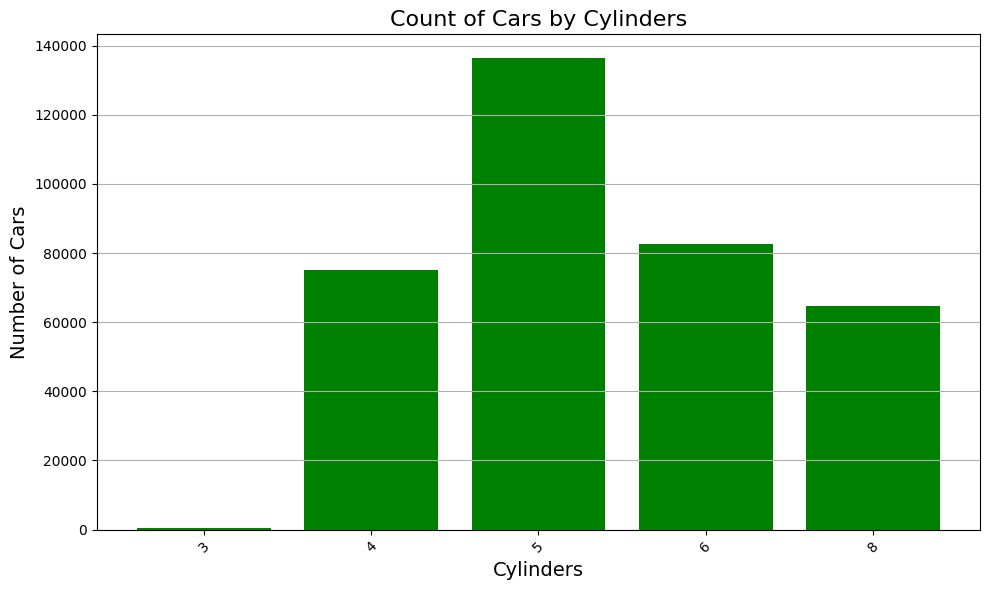

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(cylinders_counts.index.astype(str), cylinders_counts.values, color='green')
plt.title('Count of Cars by Cylinders', fontsize=16)
plt.xlabel('Cylinders', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Fuel vs Count of Cars

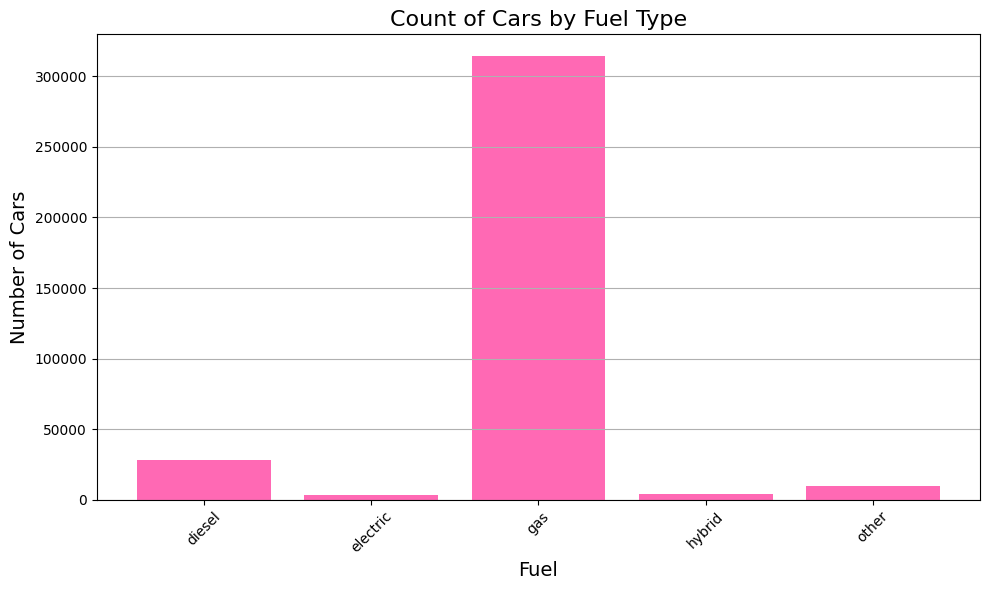

In [42]:
fuel_counts = df['fuel'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(fuel_counts.index.astype(str), fuel_counts.values, color='hotpink')
plt.title('Count of Cars by Fuel Type', fontsize=16)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Transmission vs Count of Cars

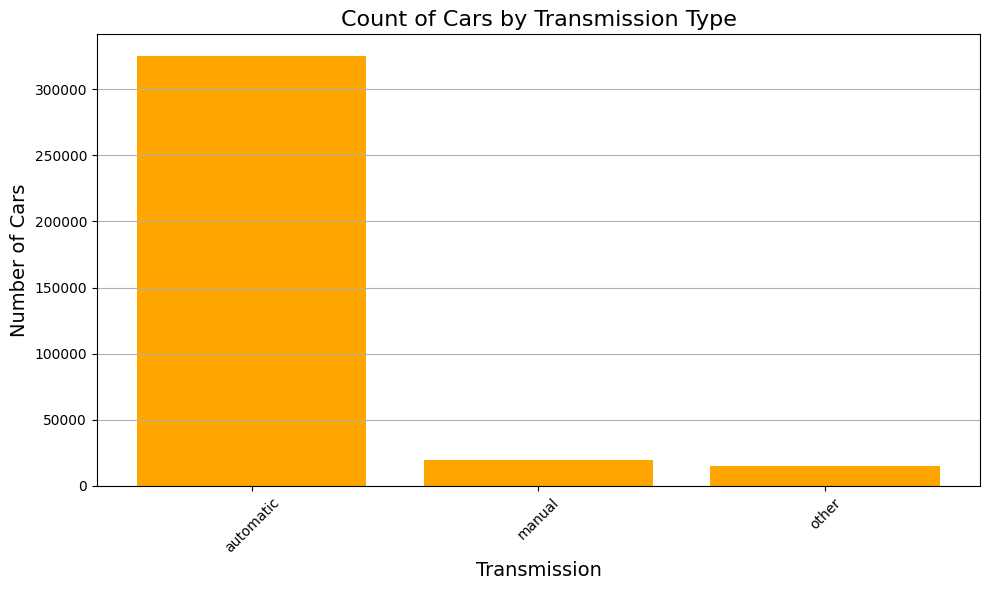

In [43]:
transmission_counts = df['transmission'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(transmission_counts.index.astype(str), transmission_counts.values, color='orange')
plt.title('Count of Cars by Transmission Type', fontsize=16)
plt.xlabel('Transmission', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Size Count

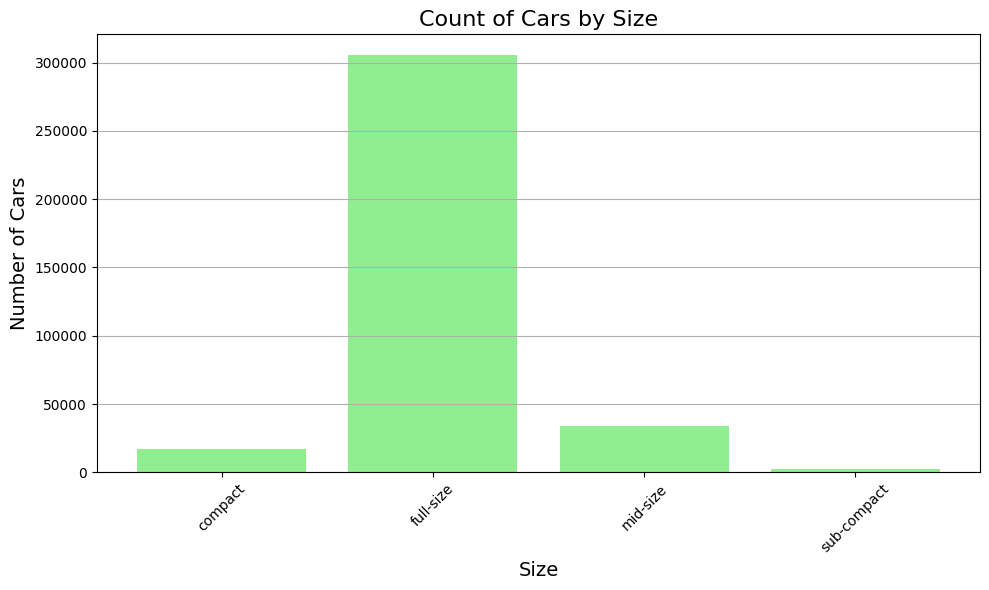

In [44]:
size_counts = df['size'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(size_counts.index.astype(str), size_counts.values, color='lightgreen')
plt.title('Count of Cars by Size', fontsize=16)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Type Counts

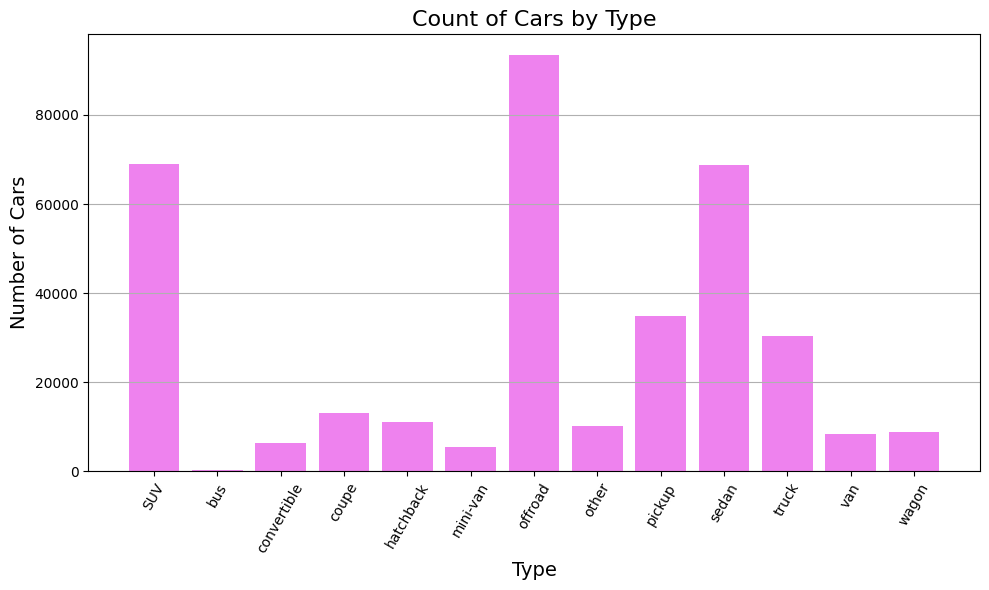

In [45]:
type_counts = df['type'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index.astype(str), type_counts.values, color='violet')
plt.title('Count of Cars by Type', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=60)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Title Status Count

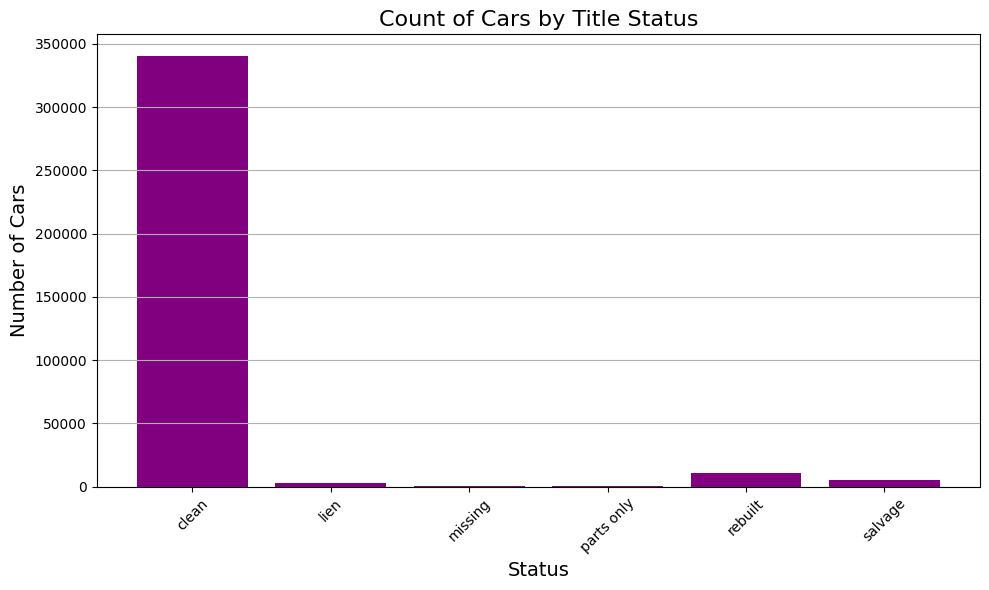

In [46]:
title_status_counts = df['title_status'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(title_status_counts.index.astype(str), title_status_counts.values, color='purple')
plt.title('Count of Cars by Title Status', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Drive Count

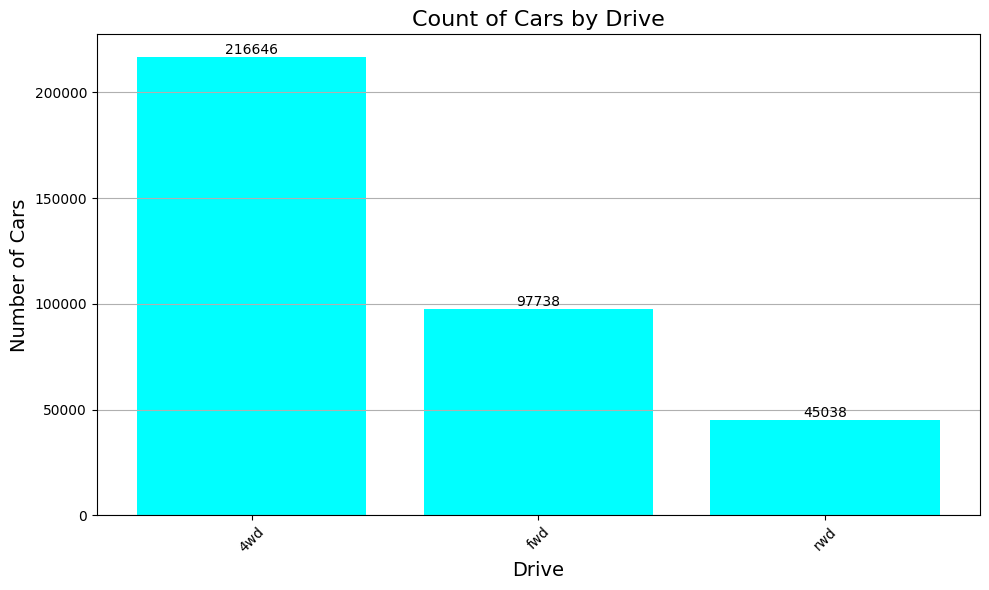

In [47]:
drive_counts = df['drive'].value_counts().sort_index()
plt.figure(figsize=(10, 6))

bars = plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')

plt.bar(drive_counts.index.astype(str), drive_counts.values, color='aqua')
plt.title('Count of Cars by Drive', fontsize=16)
plt.xlabel('Drive', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Year vs Average Price

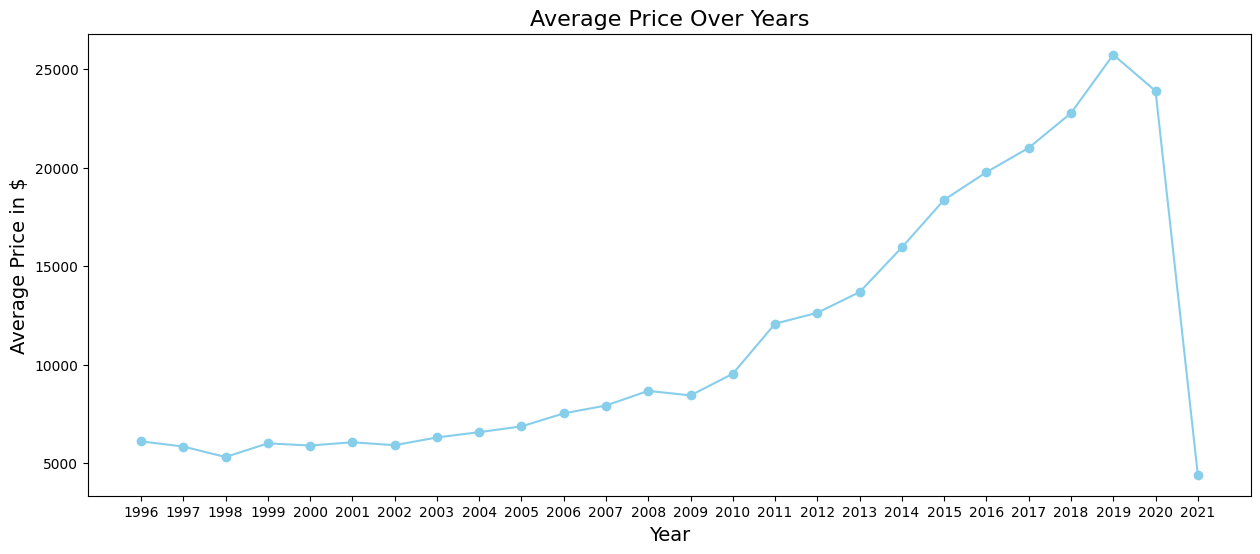

In [48]:
average_price_per_year = df.groupby('year')['price'].mean().reset_index().astype(int)
average_price_per_year.columns = ['Year', 'Average Price']  # Rename columns for clarity

plt.figure(figsize=(15, 6))
plt.plot(average_price_per_year['Year'], average_price_per_year['Average Price'], marker='o', color='skyblue', linestyle='-')
plt.title('Average Price Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price in $', fontsize=14)
plt.xticks(average_price_per_year['Year'])
plt.show()

# Next Step

In [49]:
df.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long,price
0,7119256118,mohave county,2012,jeep,patriot,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,silver,34.4554,-114.2690,3495
1,7120880186,oregon coast,2014,bmw,328i m-sport,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,grey,46.1837,-123.8240,13750
2,7115048251,greenville / upstate,2001,dodge,caravan,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,grey,34.9352,-81.9654,2300
3,7119250502,mohave county,2004,chevrolet,colorado ls,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,red,34.4783,-114.2710,9000
4,7120430837,maine,2005,ford,mustang convertible,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,silver,44.2070,-69.7858,8500


In [50]:
for i in num_features:
    print(f'{i} : ', df[i].nunique())
    print(f'{i} null value count : ', df[i].isna().sum())

id :  359422
id null value count :  0
year :  26
year null value count :  0
cylinders :  5
cylinders null value count :  0
odometer :  109600
odometer null value count :  0
lat :  44639
lat null value count :  0
long :  44156
long null value count :  0
price :  14567
price null value count :  0


In [51]:
for i in cat_features:
    print(f'{i} : ', df[i].nunique())
    print(f'{i} null values count : ', df[i].isna().sum())

region :  402
region null values count :  0
manufacturer :  41
manufacturer null values count :  0
model :  26637
model null values count :  0
condition :  6
condition null values count :  0
fuel :  5
fuel null values count :  0
title_status :  6
title_status null values count :  0
transmission :  3
transmission null values count :  0
drive :  3
drive null values count :  0
size :  4
size null values count :  0
type :  13
type null values count :  0
paint_color :  12
paint_color null values count :  0


In [52]:
for i in cat_features:
    print(f'{i} : ', df[i].nunique())

region :  402
manufacturer :  41
model :  26637
condition :  6
fuel :  5
title_status :  6
transmission :  3
drive :  3
size :  4
type :  13
paint_color :  12


In [53]:
# count_nan = df_copy['condition'].value_counts().get('nan', 0)
# print("Count of 'excellent':", count_nan)

### Dropping Unwanted Columns

In [54]:
df = df.drop(['id', 'manufacturer', 'model', 'region', 'lat', 'long', 'paint_color'], axis=1)

In [55]:
df.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,2012,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,3495
1,2014,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,13750
2,2001,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,2300
3,2004,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,9000
4,2005,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,8500


In [56]:
df.dtypes

year             int64
condition       object
cylinders        int64
fuel            object
odometer         int64
title_status    object
transmission    object
drive           object
size            object
type            object
price            int64
dtype: object

### Dropping Unwanted Columns

In [57]:
df_copy = df

In [58]:
df_copy.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,price
0,2012,like new,4,gas,247071,clean,automatic,4wd,full-size,offroad,3495
1,2014,good,5,gas,76237,clean,automatic,rwd,full-size,sedan,13750
2,2001,excellent,6,gas,199000,clean,automatic,4wd,full-size,offroad,2300
3,2004,excellent,5,gas,54000,clean,automatic,rwd,mid-size,pickup,9000
4,2005,excellent,6,gas,62800,clean,automatic,rwd,mid-size,convertible,8500


# Depedent and Independent Variables

In [59]:
X = df_copy.drop(['price'], axis=1)

In [60]:
X.shape

(359422, 10)

In [61]:
y = df_copy['price']

In [62]:
y.shape

(359422,)

# Split the Dataset
### Divide the dataset into training, validation, and test sets to evaluate model performance effectively.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
283003,2009,like new,8,hybrid,131000,clean,automatic,4wd,full-size,SUV
267921,2011,excellent,6,gas,95502,clean,automatic,rwd,full-size,sedan
315144,2007,fair,5,gas,99803,clean,automatic,4wd,full-size,offroad
233216,2013,good,5,diesel,203517,clean,automatic,4wd,full-size,truck
55180,2014,like new,4,gas,110000,clean,automatic,fwd,full-size,sedan


In [65]:
X_train.shape

(287537, 10)

In [66]:
X_test.shape

(71885, 10)

In [67]:
y_train.shape

(287537,)

In [68]:
y_test.shape

(71885,)

## Feature Scaling

##### Numerical Colums Extracting and Scaling

In [69]:
numerical_features = X.select_dtypes('number').columns
numerical_features

Index(['year', 'cylinders', 'odometer'], dtype='object')

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Use the same scaler to transform the test data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [71]:
y_train_reshaped = y_train.values.reshape(-1, 1)
y_train = scaler.fit_transform(y_train_reshaped)
y_test_reshaped = y_test.values.reshape(-1, 1)
y_test = scaler.transform(y_test_reshaped)
y_test

array([[ 0.03019761],
       [-0.05101027],
       [-0.33844344],
       ...,
       [ 1.64901266],
       [-1.03298454],
       [-0.37081974]])

## Encoding

##### Categorical Columns Extracting and Encoding

In [72]:
categorical_features = X.select_dtypes(exclude='number').columns
categorical_features

Index(['condition', 'fuel', 'title_status', 'transmission', 'drive', 'size',
       'type'],
      dtype='object')

#### One Hot Encoding

In [73]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
exclude_condition = categorical_features

# Identify features to encode
features_to_encode = [col for col in categorical_features if col in exclude_condition]
print(features_to_encode)
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform only the selected categorical columns
encoded_array = encoder.fit_transform(X_train[features_to_encode]).toarray()

# Create a DataFrame from the encoded array
encoded_columns_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(features_to_encode))

# Drop original categorical columns from X_train
X_train_dropped = X_train.drop(columns=features_to_encode)

# Concatenate the encoded columns with remaining features
X_train_final = pd.concat([X_train_dropped.reset_index(drop=True), encoded_columns_df.reset_index(drop=True)], axis=1)

# Display the final DataFrame
X_train_final.head()

['condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type']


,year,cylinders,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,-0.414907,1.845184,0.545267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.026556,0.334482,-0.087130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.803257,-0.420869,-0.010508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.361795,-0.420869,1.837159,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.555971,-1.176221,0.171152,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [74]:
# Now handle X_test using the same encoder
encoded_array_test = encoder.transform(X_test[features_to_encode]).toarray()

# Create a DataFrame from the encoded array for X_test
encoded_columns_df_test = pd.DataFrame(encoded_array_test, columns=encoder.get_feature_names_out(features_to_encode))

# Drop original categorical columns from X_test
X_test_dropped = X_test.drop(columns=features_to_encode)

# Concatenate the encoded columns with remaining features in X_test
X_test_final = pd.concat([X_test_dropped.reset_index(drop=True), encoded_columns_df_test.reset_index(drop=True)], axis=1)
X_test_final.head()

,year,cylinders,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,fuel_diesel,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,-0.026556,-0.420869,0.301024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.944321,-0.420869,-0.942090,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.361795,-1.176221,-0.351166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.138497,-1.176221,-1.340969,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.555971,-1.176221,-0.088056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [75]:
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras

In [76]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.fit(X_train_final, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 59s 8ms/step - loss: 0.3649 - val_loss: 0.2661
Epoch 2/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 52s 7ms/step - loss: 0.2842 - val_loss: 0.2613
Epoch 3/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.2762 - val_loss: 0.2565
Epoch 4/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.2707 - val_loss: 0.2522
Epoch 5/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.2646 - val_loss: 0.2586
Epoch 6/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.2615 - val_loss: 0.2515
Epoch 7/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.2562 - val_loss: 0.2515
Epoch 8/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.2559 - val_loss: 0.2492
Epoch 9/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.2520 - val_loss: 0.2505
Epoch 10/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.2530 - val_loss: 0.2516
Epoch 11/20
7189/7189 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.2503 - val_loss: 0.2518
Epoch 12/20
7189/71

ImportError: cannot import name 'r2_scorbe' from 'sklearn.metrics' (C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [77]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test_final)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

2247/2247 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step
MAE: 0.3427490952643036
R²: 0.7490830922489051


# Pipeline Creation

In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [79]:
# Define your numerical and categorical features
numerical_features = ['year', 'cylinders', 'odometer']  # List your numerical feature column names
categorical_features = ['condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type']  # List your categorical feature column names

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [80]:
# Define a function to create the Keras model
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create the full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, epochs=20, batch_size=32, verbose=0))
])

AttributeError: module 'keras._tf_keras.keras' has no attribute 'wrappers'

In [ ]:
# Assuming you have your features in X and target in y
X = df_copy.drop(['price'], axis=1)  # Your feature DataFrame
y = df_copy['price']  # Your target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the model on the training data
model_pipeline.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model performance
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))